# **Part 3: Shared Visualization**

For this part, we used our ss

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
def makeChartManual(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

For the second visualization, we compared the distribution of our data over the course of a day (averaged)

In [13]:
# Load exported analysis dataframes as csvs
df_gauri = pd.read_csv('gauri_analyzed.csv')
df_kyle = pd.read_csv('separated_timestamps.csv')

In [22]:
# Dictionary formatted with keys as 24hrs
all_days = {}
for i in range(0,24):
  all_days[i] = 0

avg_day_gauri = {}
avg_day_kyle = {}

# Function to iterate through each day, count number of searches each hour
def avg_calc(dataframe, dic):
  for date in dataframe['date'].unique():
    day = dataframe[dataframe['date'] == date]

    for hour in day['hour']:
      all_days[hour] += 1

  # Averages by the number of days in data
  for hour, total in all_days.items():
    dic[hour] = total/(dataframe['date'].nunique())

avg_calc(df_gauri, avg_day_gauri)
avg_calc(df_kyle, avg_day_kyle)

{0: 0.34375, 1: 0.35714285714285715, 2: 0.2857142857142857, 3: 0.2261904761904762, 4: 0.15625, 5: 0.30952380952380953, 6: 0.36607142857142855, 7: 0.28422619047619047, 8: 0.29910714285714285, 9: 0.40922619047619047, 10: 0.45535714285714285, 11: 0.44642857142857145, 12: 0.3794642857142857, 13: 0.3273809523809524, 14: 0.22172619047619047, 15: 0.13541666666666666, 16: 0.11755952380952381, 17: 0.125, 18: 0.1324404761904762, 19: 0.17113095238095238, 20: 0.18898809523809523, 21: 0.17113095238095238, 22: 0.19940476190476192, 23: 0.2261904761904762}


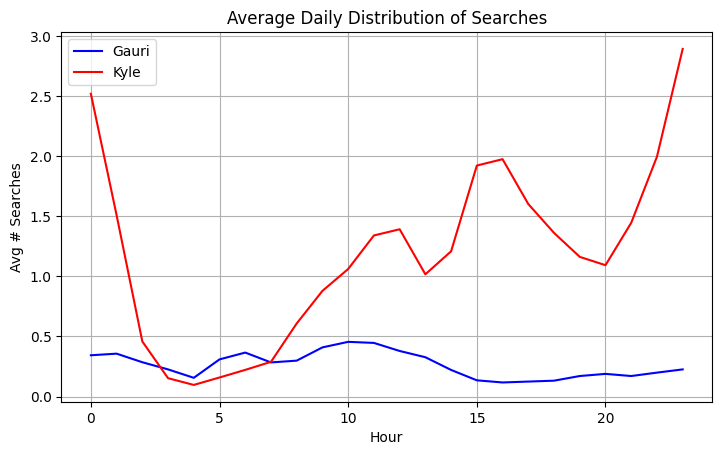

In [25]:
# Plot average daily data for both of us
plt.figure(figsize=(8.4,4.8))
plt.grid(True)
plt.plot(avg_day_gauri.keys(), avg_day_gauri.values(), color='blue', label='Gauri')
plt.plot(avg_day_kyle.keys(), avg_day_kyle.values(), color='red', label='Kyle')
plt.legend()
makeChartManual('Hour','Avg # Searches','Average Daily Distribution of Searches')

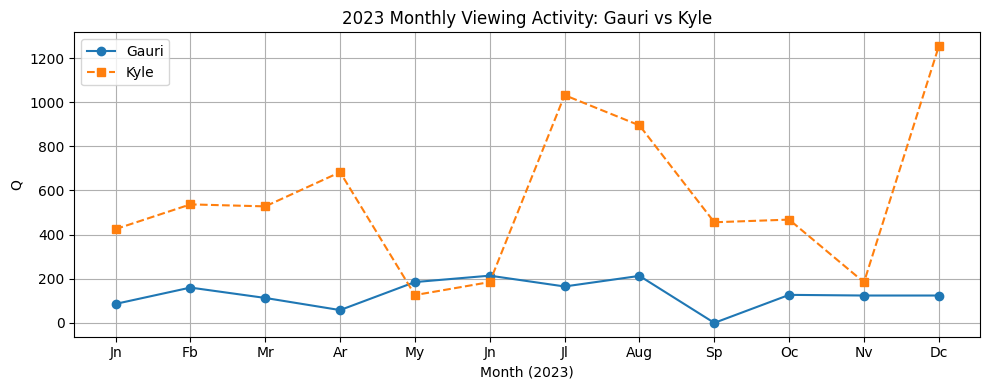

In [ ]:
# Another one we did (very basic - seeing trends in 2023 on a single comparitive visualization, same groupby method just for both for comparison)
# Again comparing apples with oranges = as instances of watch vs search would be high for any 2 people
df_gauri = pd.read_csv('/gauri_analyzed (1).csv')
df_kyle  = pd.read_csv('/separated_timestamps.csv')

df_gauri_2023 = df_gauri[df_gauri['year'] == 2023]
df_kyle_2023  = df_kyle[df_kyle['year']  == 2023]
gauri_counts = (
    df_gauri_2023
    .groupby('month')
    .size()
    .reindex(range(1,13), fill_value=0)
)
kyle_counts = (
    df_kyle_2023
    .groupby('month')
    .size()
    .reindex(range(1,13), fill_value=0)
)
plt.figure(figsize=(10, 4))
plt.plot(
    gauri_counts.index, gauri_counts.values,
    marker='o', linestyle='-', label='Gauri'
)
plt.plot(
    kyle_counts.index, kyle_counts.values,
    marker='s', linestyle='--', label='Kyle'
)
months = ['Jn','Fb','Mr','Ar','My','Jn','Jl','Aug','Sp','Oc','Nv','Dc']
plt.xticks(range(1,13), months)
plt.xlabel('Month (2023)')
plt.ylabel('Q')
plt.title('2023 Monthly Viewing Activity: Gauri vs Kyle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


TLDR

After finishing the project Kyle and I inferred the following from our data: 1.) There was an obvious difference between the stats for Kyle's data vs Gauri's as we shared yt watch history timestamps vs search history timestamps respectively.

2.) Some of the obvious variables leading to the difference in the number observations such as =

the number of observations for both between 2020-2025 (4.5k in the search history data Gauri shared vs 32 k in the watch history data that Kyle shared.) We click what we see. Thereby, there would have been a large number of watches vs searches between any given two people. Yes, this could also have been impacted by other counfounding variables such as individual data consumption styles but this was one of the obvious factors that struck out to us.

3.) For both of the datasets, the highest numbers were surprisingly seen during 2025 (For Gauri Jan and for Kyle March) which was during winter and spring breaks likely due to an excess amount of spare time ;)

4.) For Kyle, there is an observable spike after July 2023 which continues to drop a bit around July 2024, and witnessed an all time high in the march of 2025 indicating an increasing content consumption on the platform. Additionally, the average for March (from all 5 years) across all months is the highest.

5.) For Gauri, summer and winter months played a huge role as a deciding factor with late searches (around midnight) increasing during the winter months

